In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec ,  TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
# Tokenization of each document
import nltk
nltk.download('punkt')
tokenized_project = []
for project in new_corpus_customsp:
    tokenized_project.append(word_tokenize(project.lower()))
tokenized_project

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(project, [i]) for i, project in enumerate(tokenized_project)]
tagged_data

[TaggedDocument(words=['de', 'duplication', 'faces', 'major', 'challenges', 'de', 'dup', 'algorithm', 'complexity', 'means', 'time', 'get', 'answer', 'rise', 'exponentially', 'increase', 'solved', 'sorted', 'neighborhood', 'second', 'achieve', 'tradeoff', 'precision', 'recall', 'improves', 'score', 'solved', 'machine', 'learning', 'collecting', 'training'], tags=[0]),
 TaggedDocument(words=['analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'comparison', 'peers', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'calculated', 'liquidity', 'financing', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited'], tags=[1]),
 TaggedDocument(words=['psnr', 'currently', 'drafting', 'paperforthe', 'algorithm', 'reconstruction', 'k', 'space', 'superresolution', 'images', 'nmri', 'lot', 'faster', 'highly', 'sub', 'sampled', 'knee', 'mri', 'forthe', 'packed', 'imaginary', 'na

In [ ]:
## Train doc2vec model
d2v_model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
d2v_model.save("test_doc2vec.model")
## Load saved doc2vec model
d2v_model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
d2v_model.wv.vocab

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


{'de': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339240>,
 'duplication': <gensim.models.keyedvectors.Vocab at 0x7fe0e63392e8>,
 'faces': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339358>,
 'major': <gensim.models.keyedvectors.Vocab at 0x7fe0e63393c8>,
 'challenges': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339400>,
 'dup': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339470>,
 'algorithm': <gensim.models.keyedvectors.Vocab at 0x7fe0e63394a8>,
 'complexity': <gensim.models.keyedvectors.Vocab at 0x7fe0e63394e0>,
 'means': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339550>,
 'time': <gensim.models.keyedvectors.Vocab at 0x7fe0e63395c0>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339630>,
 'answer': <gensim.models.keyedvectors.Vocab at 0x7fe0e63396a0>,
 'rise': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339710>,
 'exponentially': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339748>,
 'increase': <gensim.models.keyedvectors.Vocab at 0x7fe0e6339780>,
 'solved': <gensi

In [ ]:
doc_vectors = d2v_model.docvecs.doctag_syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


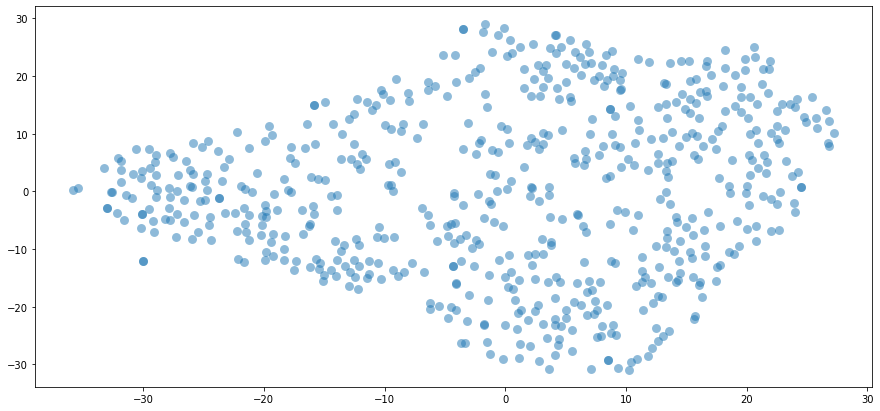

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(doc_vectors, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


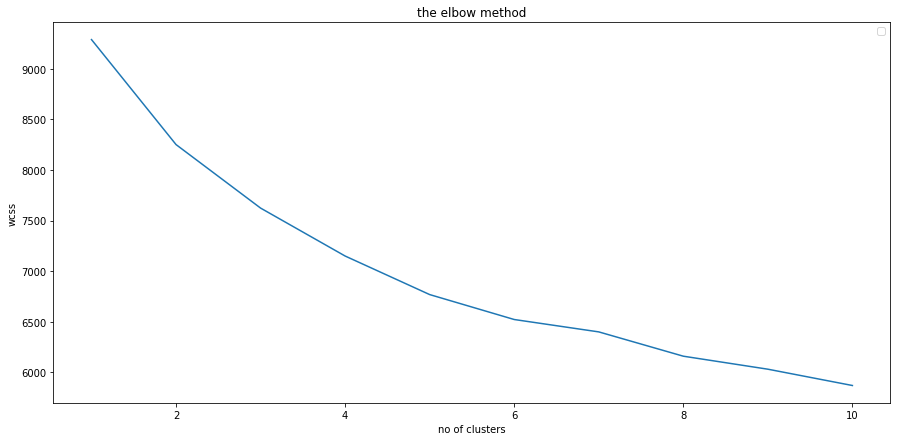

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(doc_vectors)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(doc_vectors)
print(y_kmeans)

[1 7 1 1 5 0 3 4 4 3 1 0 7 5 4 2 3 7 3 3 3 3 3 3 3 3 3 3 0 4 2 0 3 4 1 4 4
 1 1 3 5 0 0 4 5 3 0 1 1 3 2 3 3 4 4 4 3 4 1 1 0 1 3 3 4 7 5 5 1 2 1 4 1 4
 3 4 3 3 1 1 0 7 1 3 1 3 4 4 3 7 1 1 4 2 4 3 7 3 4 5 4 1 4 4 1 3 0 1 3 4 3
 4 3 4 1 0 5 5 5 2 0 0 1 4 1 4 4 4 4 5 1 1 4 3 1 0 4 4 1 4 4 4 2 5 4 1 4 4
 4 4 4 5 4 3 3 1 1 2 4 3 2 4 1 1 3 3 3 1 5 4 0 2 0 4 5 5 5 4 4 4 4 4 4 4 4
 7 3 0 7 4 2 3 1 4 5 1 6 9 4 4 1 1 0 2 3 1 4 1 8 4 4 1 3 3 1 4 4 0 1 1 5 0
 4 4 4 4 1 1 1 4 1 1 1 2 4 4 4 2 1 4 4 0 4 4 4 5 5 4 4 4 4 5 4 5 5 2 4 1 2
 4 1 4 7 0 4 4 4 1 1 4 5 7 1 0 4 4 1 4 3 3 5 5 1 1 1 4 1 4 1 5 4 1 4 4 4 1
 5 4 2 4 5 5 4 0 4 5 4 4 1 2 1 4 4 1 4 1 4 1 4 5 1 4 4 4 5 5 1 4 7 7 1 4 0
 5 4 4 5 4 4 4 7 0 1 1 1 4 0 0 4 3 2 0 0 1 4 1 4 4 0 1 1 0 1 0 1 1 1 4 4 4
 7 4 1 3 1 1 8 4 4 3 3 3 4 4 1 0 5 4 4 4 5 5 4 1 5 8 1 4 4 3 4 1 1 4 7 4 4
 1 4 2 5 2 3 4 4 3 3 1 5 5 3 4 3 3 1 1 4 4 1 2 3 5 4 7 4 0 4 3 1 7 2 4 4 5
 5 4 4 4 4 7 4 1 4 2 4 1 1 5 1 4 4 4 5 7 4 5 1 1 7 4 0 1 5 3 5 0 1 4 4 0 5
 3 3 1 1 4 4 3 4 5 4 4 4 

In [ ]:
len(y_kmeans)

628

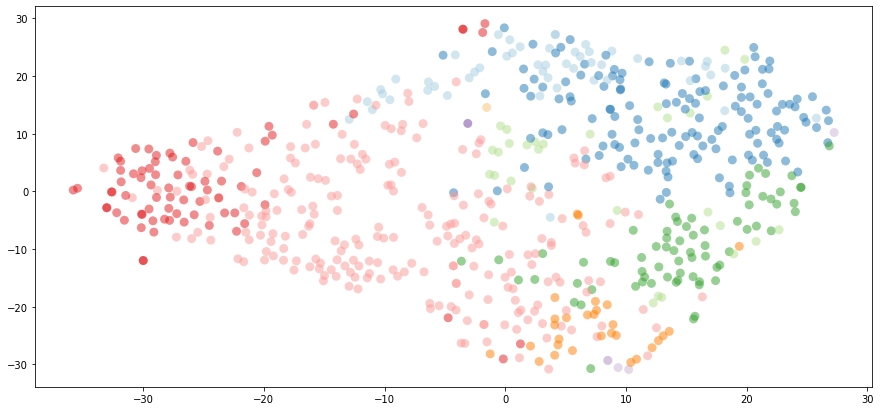

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[doc_vectors] if doc_vectors >= 0
                  else (0.5, 0.5, 0.5)
                  for doc_vectors in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(doc_vectors) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(doc_vectors, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.1190377
For no of clusters = 3  The average silhouette_score is : 0.11304401
For no of clusters = 4  The average silhouette_score is : 0.10070813
For no of clusters = 5  The average silhouette_score is : 0.09825814
For no of clusters = 6  The average silhouette_score is : 0.0894721
For no of clusters = 7  The average silhouette_score is : 0.05107381
For no of clusters = 8  The average silhouette_score is : 0.08558036
For no of clusters = 9  The average silhouette_score is : 0.09472103
For no of clusters = 10  The average silhouette_score is : 0.08121024


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

50

In [ ]:
#projects in cluster 1
list1

['american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accuracy disease ensemble models',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'cbir inria holidays colour histogram image ndesc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
51                  image  0.139041
53                 images  0.117145
69                network  0.083793
104               trained  0.080724
72                 neural  0.061263
60               learning  0.061014
26                   deep  0.059453
58               language  0.055346
27          deep learning  0.049198
81                  paper  0.047008
71               networks  0.043760
73         neural network  0.043200
33                    end  0.042851
35                   face  0.042006
101                  time  0.041782
50                  human  0.041161
91           segmentation  0.038360
47             generating  0.038004
84             processing  0.036213
94             similarity  0.035209
23          convolutional  0.034812
45               generate  0.034729
19                    cnn  0.034604
6               algorithm  0.034316
21               computer  0.034210
88             resolution  0.034035
24   convolutional neural  0.033242
106              training  0.033186
74        neural networks  0.032716
40                  frame  0.032650
57                   lane  0.031319
2                accuracy  0.030584
22        computer vision  0.029168
109                vision  0.029168
46              generated  0.028540
65                 models  0.027842
37               features  0.027650
32                emotion  0.027056
78                   nthe  0.027003
83               pipeline  0.026219

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of american is : 1
Frequency of sign is : 2
Frequency of language is : 12
Frequency of primary is : 1
Frequency of north is : 1
Frequency of america is : 1
Frequency of deaf is : 1
Frequency of individuals is : 2
Frequency of also is : 10
Frequency of hard is : 1
Frequency of hearing is : 2
Frequency of employs is : 1
Frequency of signs is : 3
Frequency of hand is : 3
Frequency of along is : 3
Frequency of facial is : 4
Frequency of gestures is : 3
Frequency of bodily is : 1
Frequency of pastures is : 1
Frequency of images is : 36
Frequency of contained is : 1
Frequency of encoded is : 1
Frequency of alphabetic is : 1
Frequency of letters is : 2
Frequency of trained is : 27
Frequency of convolutional is : 9
Frequency of neural is : 20
Frequency of network is : 32
Frequency of classify is : 5
Frequency of asl is : 1
Frequency of loading is : 1
Frequency of examining is : 1
Frequency of preprocessing is : 2
Frequency of tested is : 2
Frequency of end is : 12
Frequency of pipeli

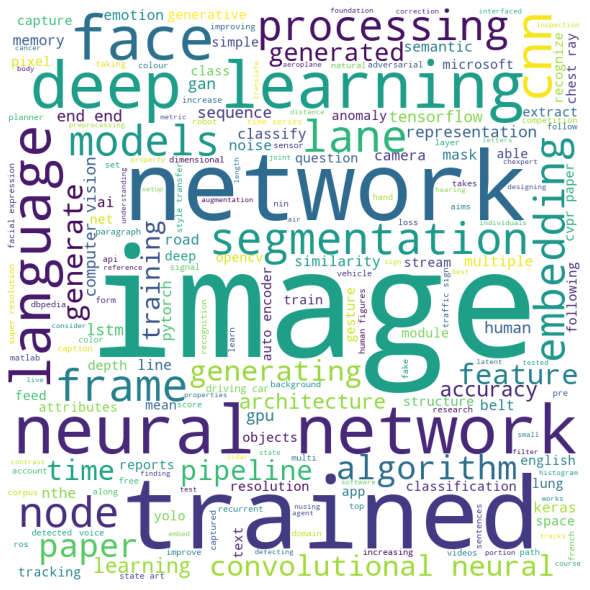

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

138

In [ ]:
list2

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'players elaborate manual workflow evaluate nevaluation players multi million dollar industry generate four times revenue compared calculate entire game digitalized cameras iot devices cloud

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
129           network  0.055752
199           trained  0.054264
107          learning  0.053240
132            neural  0.050775
95             images  0.042866
37                cnn  0.038373
133    neural network  0.037446
117              lstm  0.036798
1            accuracy  0.035928
53               deep  0.035282
122            models  0.033665
30     classification  0.033378
118           machine  0.033104
94              image  0.032272
3           algorithm  0.031087
54      deep learning  0.029849
131          networks  0.029638
163       recognition  0.029397
156            python  0.028206
8        architecture  0.026960
189        tensorflow  0.025229
119  machine learning  0.025133
201          training  0.025038
101          language  0.024318
112              like  0.024097
34           classify  0.024067
4          algorithms  0.024057
197              time  0.022380
29            classes  0.022162
181             state  0.020736

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 3
Frequency of duplication is : 1
Frequency of faces is : 5
Frequency of major is : 3
Frequency of challenges is : 1
Frequency of dup is : 1
Frequency of algorithm is : 16
Frequency of complexity is : 1
Frequency of means is : 1
Frequency of time is : 12
Frequency of get is : 5
Frequency of answer is : 4
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 2
Frequency of solved is : 3
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 1
Frequency of achieve is : 4
Frequency of tradeoff is : 1
Frequency of precision is : 3
Frequency of recall is : 3
Frequency of improves is : 1
Frequency of score is : 8
Frequency of machine is : 18
Frequency of learning is : 40
Frequency of collecting is : 1
Frequency of training is : 14
Frequency of psnr is : 1
Frequency of currently is : 4
Frequency of drafting is : 2
Frequency of paperforthe is : 1
Frequency of reconstruction is : 1
Frequency of k is : 5
Frequency

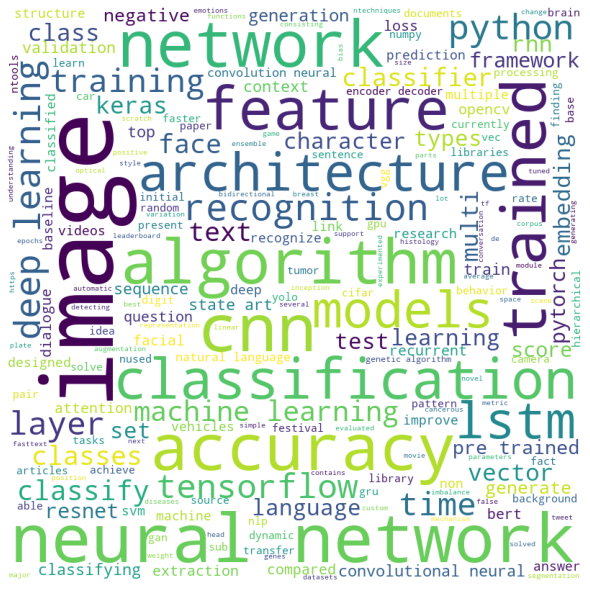

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

30

In [ ]:
list3

['clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top designing scripts get erps etl scripts transform understanding business problems crating interactive exploration visualization templates feature engineering training anomaly algorithms',
 'bidirectional autoencoder extracted context nreference get softmax probabilities possible answers question extracted edges relations commonsense corporas like conceptnet nell making commonsense inclusive vectors relations extracted like conceptnet numberbatch nresearch areas natural language processing machine learning',
 'learning representations graphs predicting missing links improvements recent models like rotate distmult transe convkb tucker nincorporation adjacent neighbors loss learning representations entity relation slight improvements state art mean reciproca

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
22            learning  0.146376
57                text  0.107457
27             machine  0.094003
28    machine learning  0.093594
2             analysis  0.087243
7       classification  0.077443
15             feature  0.073966
23                like  0.072179
46            question  0.070175
17             genetic  0.062688
16            features  0.057258
45              python  0.054277
60                 vec  0.050594
1           algorithms  0.050468
35            negative  0.050324
40            positive  0.050324
37                 nlp  0.049184
52           sentiment  0.048997
18               human  0.046157
50            research  0.045931
32              models  0.045348
30              mining  0.044983
0            algorithm  0.044848
8             classify  0.043173
42          predicting  0.042821
3              answers  0.040601
44          processing  0.040035
14          extraction  0.038911
53  sentiment analysis  0.037909
43            problems  0.037535

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of clients is : 1
Frequency of many is : 2
Frequency of erps is : 3
Frequency of sap is : 1
Frequency of oracle is : 1
Frequency of financial is : 3
Frequency of maintain is : 1
Frequency of though is : 1
Frequency of captured is : 1
Frequency of analysis is : 16
Frequency of remains is : 1
Frequency of client is : 1
Frequency of audit is : 1
Frequency of analytics is : 3
Frequency of platform is : 1
Frequency of transform is : 2
Frequency of interface is : 1
Frequency of conducting is : 1
Frequency of exploratory is : 4
Frequency of visualization is : 3
Frequency of tools is : 1
Frequency of anomaly is : 2
Frequency of duplication is : 1
Frequency of top is : 1
Frequency of designing is : 2
Frequency of scripts is : 2
Frequency of get is : 4
Frequency of etl is : 1
Frequency of understanding is : 3
Frequency of business is : 2
Frequency of problems is : 3
Frequency of crating is : 1
Frequency of interactive is : 1
Frequency of exploration is : 1
Frequency of templates is : 1

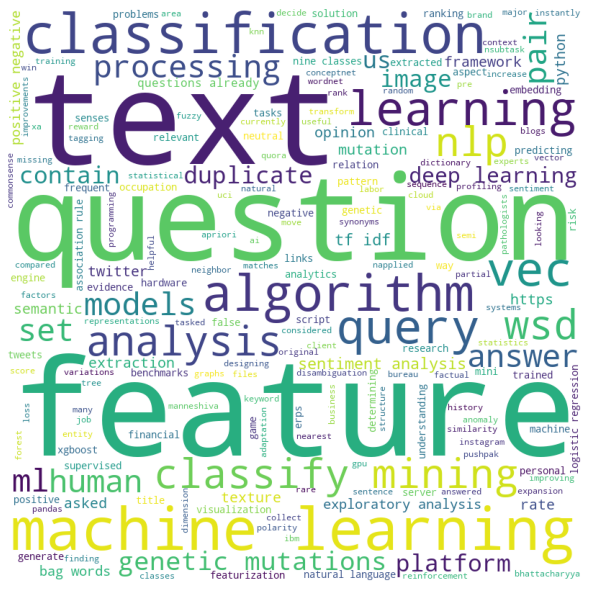

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

72

In [ ]:
list4

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'email address tracked many teams often cause delay email assigned wrong manually assigning sophisticated text mining pipeline python rapidminer easticnet adaboost algorithms tfidf partial pca feature engineering achieving much accuracy',
 'reviews cleaning visualization predicting sentiments reviews algorithms multinomial naive baye python accuracy end end web app link https tinyurl com sentiment',
 'top headlines

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
6             algorithms  0.078410
1               accuracy  0.059787
119           regression  0.058720
128                  set  0.053743
9               analysis  0.050977
114               python  0.050927
111           prediction  0.045549
57              features  0.044742
116               random  0.044225
87                models  0.042706
25        classification  0.042604
80   logistic regression  0.042196
79              logistic  0.042196
61                forest  0.039654
117        random forest  0.039654
74                  like  0.038589
26            classifier  0.036905
97                neural  0.036764
110           predicting  0.035565
135                  svm  0.035004
55               feature  0.032802
29              cleaning  0.032332
104           parameters  0.030667
39              decision  0.030096
84               methods  0.030079
150        visualization  0.030023
134           supervised  0.029598
23                 churn  0.029559
5              algorithm  0.029536
75                linear  0.028295

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of telecom is : 2
Frequency of firm is : 5
Frequency of predictive is : 4
Frequency of models is : 16
Frequency of risk is : 3
Frequency of churn is : 6
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 1
Frequency of generate is : 3
Frequency of tagging is : 1
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 3
Frequency of also is : 8
Frequency of strong is : 1
Frequency of author is : 1
Frequency of python is : 22
Frequency of library is : 5
Frequency of einsteinpy is : 1
Frequency of computations is : 1
Frequency of nrelativity is : 1
Frequency of geodesic is : 1
Frequency of equations is : 1
Frequency of solving is : 1
Frequency of odes is : 1
Frequency of visualisations is : 2
Frequency of summer is : 1
Frequency of gsoc is : 1
Frequency of openastronomy is : 1
Frequency of numbrella is : 1
Frequency of along is : 2
Frequency of standalone is : 1
Freque

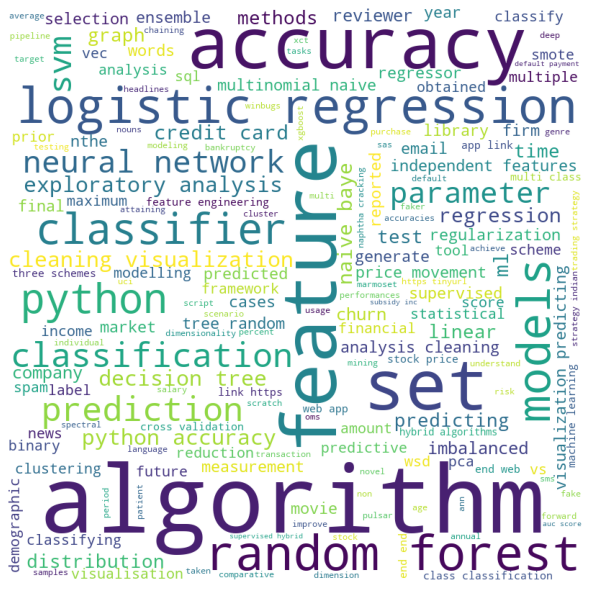

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

228

In [ ]:
list5

['analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'algorithm dynamic maze moving obstacles path source destination',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'scraping module extract disease web newspapers last years instituted unsupervised classifier sentiment analyser categorize articles types effect reader temporal regional analysis extracted analyze progress suggest modification nhiv eradication campaign',
 'heavy loads servers reduced ipfs warning red zones city',
 'chunking maximum entropy models koe https www aclweb org anthology w pdf baseline selects chunk tag frequently associated nthe speech tag',
 'muliple contact channels dialler email sms contact custome

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
2227                  image  0.011356
3882                 python  0.011304
210                analysis  0.010800
2582               learning  0.009326
5339                website  0.009012
3775             processing  0.008771
291                     app  0.008613
2623                   like  0.008372
4918                   time  0.008081
4890                   text  0.007648
4001         recommendation  0.007604
1934                   game  0.007331
1557                 engine  0.007153
1539                    end  0.007059
2539               language  0.007058
3602               platform  0.006648
686                     car  0.006595
2699                machine  0.006585
4254                  sales  0.006501
246                 android  0.006355
155               algorithm  0.006238
5330                    web  0.005787
2444                   java  0.005644
1243               designed  0.005489
2169                   html  0.005452
4003  recommendation engine  0.005419
4405                    set  0.005296
1752               features  0.005167
1799              filtering  0.005102
2701       machine learning  0.005098

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyzing is : 1
Frequency of millions is : 1
Frequency of financial is : 2
Frequency of fraudulent is : 1
Frequency of hand is : 2
Frequency of audit is : 1
Frequency of analytics is : 6
Frequency of platform is : 11
Frequency of leveraged is : 1
Frequency of collect is : 1
Frequency of erps is : 1
Frequency of rules is : 2
Frequency of features is : 10
Frequency of extraction is : 1
Frequency of engine is : 9
Frequency of customizable is : 1
Frequency of client is : 4
Frequency of predictive is : 3
Frequency of models is : 7
Frequency of algorithm is : 11
Frequency of dynamic is : 2
Frequency of maze is : 1
Frequency of moving is : 3
Frequency of obstacles is : 3
Frequency of path is : 4
Frequency of source is : 4
Frequency of destination is : 2
Frequency of wanted is : 1
Frequency of entities is : 2
Frequency of documents is : 2
Frequency of due is : 3
Frequency of size is : 2
Frequency of taking is : 1
Frequency of lot is : 1
Frequency of time is : 19
Frequency of manu

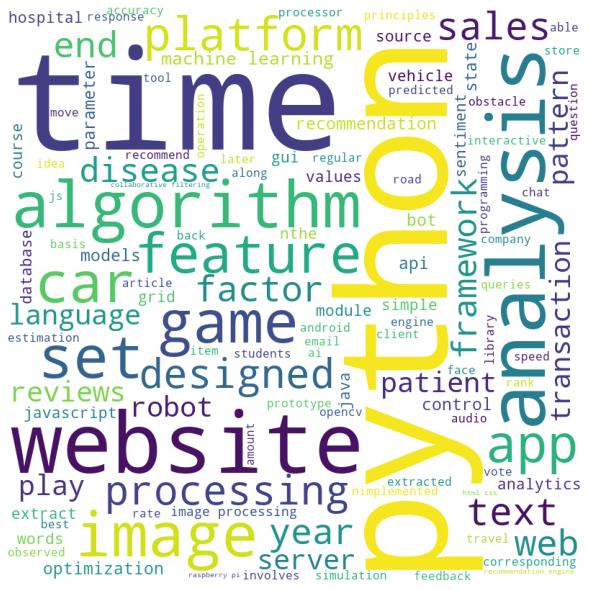

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list6 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 5:
        list6.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list6)

74

In [ ]:
list6

['side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'resulting mape forward prediction interval novel attention nmultivariate time series id fan false negatives false positives test samples deploying month nrunning simulation integrated control loop trip logic equipment understudy avoid fa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
6          android  0.088252
12             app  0.064919
93          module  0.058689
157        website  0.041760
149           time  0.039048
11             api  0.038741
43        features  0.038051
77            java  0.037660
53   functionality  0.034086
27         control  0.033562
104           nthe  0.032152
136         server  0.031164
156            web  0.029934
129          robot  0.029684
87             map  0.028583
83           linux  0.027482
21         channel  0.025837
59             gui  0.025715
92          mobile  0.025670
24   communication  0.025498
82            like  0.025204
125          radio  0.024646
142       software  0.024570
124         python  0.024248
16      autonomous  0.023324
101           need  0.023126
98           mysql  0.022550
116       platform  0.021478
45           files  0.021388
137        service  0.020824

In [ ]:
list60 = ' '.join(list6)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list60)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of side is : 4
Frequency of simple is : 3
Frequency of interface is : 8
Frequency of machine is : 1
Frequency of learning is : 1
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 2
Frequency of suggests is : 2
Frequency of job is : 5
Frequency of seeker is : 1
Frequency of need is : 7
Frequency of upload is : 2
Frequency of resume is : 7
Frequency of list is : 2
Frequency of relevant is : 1
Frequency of jobs is : 2
Frequency of inputs is : 1
Frequency of achieve is : 2
Frequency of web is : 8
Frequency of crawler is : 2
Frequency of get is : 7
Frequency of descriptions is : 3
Frequency of websites is : 1
Frequency of processed is : 2
Frequency of text is : 4
Frequency of mining is : 1
Frequency of extract is : 1
Frequency of finally is : 1
Frequency of predictive is : 1
Frequency of similar is : 3
Frequency of autonomous is : 6
Frequency of humanoid is : 2
Frequency of agents is : 1
Frequency of playing is : 3
Frequency of soccer is : 2

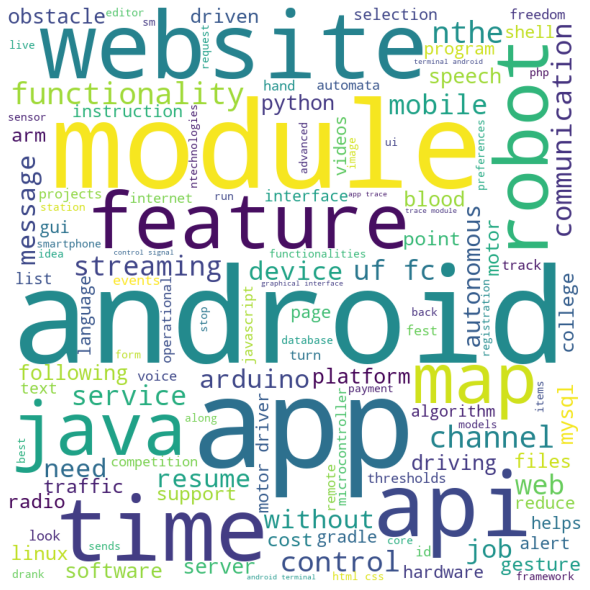

In [ ]:
list60 = ' '.join(list6)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list60) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list7 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 6:
        list7.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list7)

1

In [ ]:
list7

['shoppers move itd dream come true photos classified automatic recognition challenging picture taken lighting angles backgrounds levels occlusion meanwhile fine grained categories may look similar example ball chair vs egg chair furniture dutch oven vs french oven cookware many todays recognition machines simply cant perceive subtle differences photos yet differences could shopping decisions tackling issues like conference computer vision pattern recognition cvpr put together specifically scientists focused fine grained visual categorization called fgvc cvpr partnering malong wish science community push state art automatic image classification nin competition fgvc organizers malong algorithms step towards automatic recognition accurately assign category labels furniture home goods images']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=0, max_df=0.9, ngram_range=(1,2))
sf = cvec.fit_transform(list7)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

ValueError: ignored

In [ ]:
# second cluster
list8 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 7:
        list8.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list8)

29

In [ ]:
list8

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'clustering categorise countries socio economic health factors finding countries need focus prepared cleaned adequate along treating outliers silhouette score elbow optimal clusters assign countries cluster ids segregate logical groups patterns',
 'credit risk validation engagements aimed making banks basel ii compliant engagements broken preparation stage validation stage preparation step included creation list co ordination client get ensure correctness validation stage included validation',
 'web handling waste disposal waste recycling distribution leverages sensor placed dustbins notify full infor nmation cloud iot clustering algorithm genetic algorithm fuzzy logic optimal path relative nto waste collection center collecting w

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list8)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
2     algorithm  0.154577
4      analysis  0.132858
16    financial  0.078618
10   clustering  0.075042
47         time  0.069854
27     modeling  0.065451
33         nthe  0.065012
22        logic  0.064329
9       cluster  0.058528
8        client  0.057124
11     clusters  0.056294
7        centre  0.052863
0    accurately  0.052531
48         tool  0.049916
15     features  0.049296
23       manner  0.047661
41         risk  0.047318
43          sas  0.046617
19     included  0.046402
20         java  0.046247
24    marketing  0.046073
34      optimal  0.044479
35  preparation  0.042316
21          log  0.041672
37  probability  0.041525
18   historical  0.041300
3    algorithms  0.037549
42        sales  0.037201
6    calculated  0.037042
44     specific  0.034935

In [ ]:
list80 = ' '.join(list8)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list80)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 2
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 2
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 1
Frequency of peers is : 1
Frequency of fundamental is : 1
Frequency of analysis is : 15
Frequency of financial is : 6
Frequency of statements is : 1
Frequency of calculated is : 4
Frequency of relevant is : 1
Frequency of ratios is : 2
Frequency of evaluate is : 1
Frequency of status is : 1
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 2
Frequency of best is : 4
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of clustering is : 9
Frequency of categorise is : 1
Frequency of countries is : 3
Frequency of socio is : 1
Frequency of economic is : 1
Frequency of health is : 1
Frequency of factors is : 1
Frequency of finding is : 2
Frequency of need is : 2
Frequency of focus is : 2
Frequenc

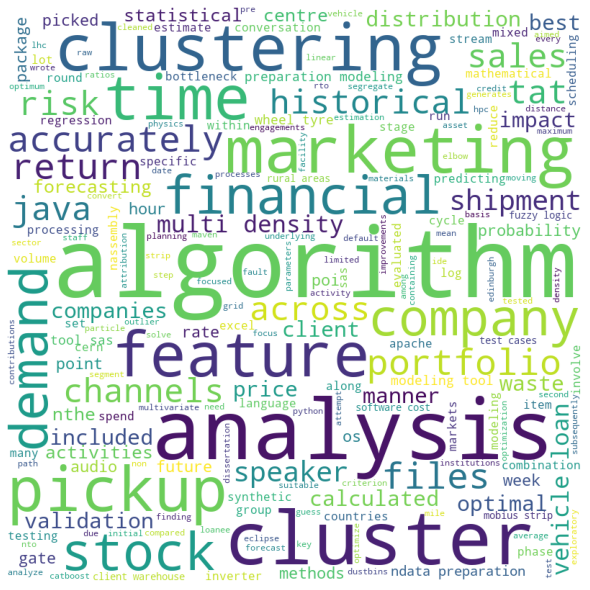

In [ ]:
list80 = ' '.join(list8)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list80) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list9 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 8:
        list9.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list9)

5

In [ ]:
list9

['breast cancer invasive cancer females worldwide accounts female cancers invasive cancers women cancer deaths worldwide including males females breast cancer nmammography energy x rays examine human breast diagnostic screening tool mammography early breast cancer typically characteristic masses micro calcifications nmany times mammogram may produce less satisfactory pleasant unpleasant mammogram influence woman come back next qualitative research methods assess patient satisfaction mammography entitled mammogram intended subjects regarding mammogram test focusing symptoms disease perceived benefits test family history regarding disease testing home efficiently think machine diagnose disease',
 'train neural network prune understand accuracy neural network affected pruned pruning effectively refers increasing sparsity network neural network layer pruning ways weight pruning set individual weights weight matrix zero corresponds deleting connections neurons consecutive layers achieve spa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list9)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
1        period  0.461728
0  irrespective  0.372285

In [ ]:
list90 = ' '.join(list9)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list90)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of breast is : 4
Frequency of cancer is : 5
Frequency of invasive is : 2
Frequency of females is : 2
Frequency of worldwide is : 2
Frequency of accounts is : 1
Frequency of female is : 1
Frequency of cancers is : 2
Frequency of women is : 2
Frequency of deaths is : 1
Frequency of including is : 1
Frequency of males is : 1
Frequency of nmammography is : 1
Frequency of energy is : 1
Frequency of x is : 1
Frequency of rays is : 1
Frequency of examine is : 1
Frequency of human is : 1
Frequency of diagnostic is : 1
Frequency of screening is : 1
Frequency of tool is : 1
Frequency of mammography is : 2
Frequency of early is : 1
Frequency of typically is : 1
Frequency of characteristic is : 1
Frequency of masses is : 1
Frequency of micro is : 1
Frequency of calcifications is : 1
Frequency of nmany is : 1
Frequency of times is : 1
Frequency of mammogram is : 4
Frequency of may is : 1
Frequency of produce is : 1
Frequency of less is : 3
Frequency of satisfactory is : 1
Frequency of ple

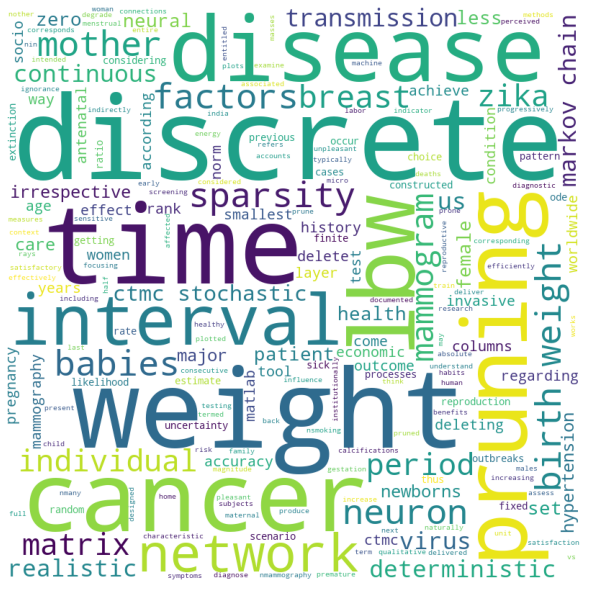

In [ ]:
list90 = ' '.join(list9)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list90) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list11 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 9:
        list11.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list11)

1

In [ ]:
list11

['asp net mvc migration web migration asp net mvc architecture developing presentation layer service layer wrapper class library component like business logic database layer introducing wrapper class library analyzing understand architecture gathered migrating asp net mvc claim handling platform wrapper class mvc reuse base controller base handles action filters mvc prepared automated unit test cases rhino mocks libraries methods achieve reusability insurance financial incurred tool handle claim like auto home property workers compensation liability division completing claim interface store loss claim amount nrole analyzing collecting story story estimation sprint plaining ui selecting payment notes module json handler jquery logic scenarios payment notes prepared automated unit test cases rhino mocks']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list11)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

ValueError: ignored